## Convolution Neural Network

In [1]:
from tensorflow import keras

### Convolutional and Pooling Layer

In [2]:
# Convolutional Layer
keras.layers.Conv2D(10, kernel_size=(3, 3), activation='relu', padding='same') # Default: padding='valid'(no padding), stride=(1, 1)

# Pooling Layer (Min, Max, Average): pool_size, strides = 2 divide the spartial dimenstion by 2
keras.layers.MaxPooling2D(2, strides=2, padding='valid') # Default: stride=None(same with pool_size, allows no overlapping)

In [3]:
# Preparing data
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

# Preprocessing data
from sklearn.model_selection import train_test_split

train_scaled = train_input.reshape(-1, 28, 28, 1) / 255.0 # add input channel dimension for cnn
train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target, test_size=0.2, random_state=42)
print(train_scaled.shape)

4431872/4422102 [==============================] - 0s 0us/step
(48000, 28, 28, 1)


In [4]:
# Build cnn model
model = keras.Sequential(name='fashion_MNIST')
# convolution + pooling layer stack
model.add(keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same', input_shape=(28, 28, 1)))
model.add(keras.layers.MaxPooling2D(2))
model.add(keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(keras.layers.MaxPooling2D(2))
# fully connected layer(dense layer)
model.add(keras.layers.Flatten()) # dense network expects 1d arrays of features
model.add(keras.layers.Dense(100, activation='relu')) # hidden layer
model.add(keras.layers.Dropout(0.4)) # add dropout to reduce overfitting
model.add(keras.layers.Dense(10, activation='softmax')) # softmax layer that outputs estimated class probabilities

model.summary()

Model: "fashion_MNIST"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 3136)              0         
                                                                 
 dense (Dense)               (None, 100)             

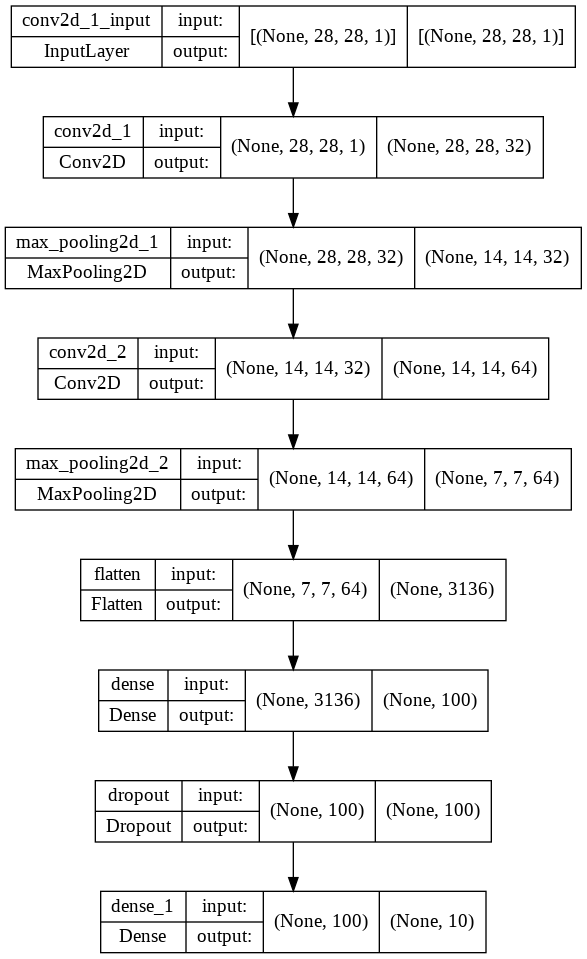

In [5]:
# Print the cnn model structure
keras.utils.plot_model(model, show_shapes=True)

In [6]:
# Train the model (adam optimizer, use checkpoint and earlystopping)
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-cnn-model.h5', save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True)

history = model.fit(train_scaled, train_target, epochs=20, validation_data=(val_scaled, val_target), 
          callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/20
1500/1500 [==============================] - 23s 7ms/step - loss: 0.5284 - accuracy: 0.8124 - val_loss: 0.3295 - val_accuracy: 0.8811
Epoch 2/20
1500/1500 [==============================] - 11s 7ms/step - loss: 0.3501 - accuracy: 0.8738 - val_loss: 0.2791 - val_accuracy: 0.8978
Epoch 3/20
1500/1500 [==============================] - 10s 7ms/step - loss: 0.2998 - accuracy: 0.8909 - val_loss: 0.2573 - val_accuracy: 0.9038
Epoch 4/20
1500/1500 [==============================] - 10s 7ms/step - loss: 0.2670 - accuracy: 0.9031 - val_loss: 0.2660 - val_accuracy: 0.9024
Epoch 5/20
1500/1500 [==============================] - 11s 7ms/step - loss: 0.2446 - accuracy: 0.9119 - val_loss: 0.2438 - val_accuracy: 0.9087
Epoch 6/20
1500/1500 [==============================] - 11s 7ms/step - loss: 0.2229 - accuracy: 0.9178 - val_loss: 0.2262 - val_accuracy: 0.9183
Epoch 7/20
1500/1500 [==============================] - 12s 8ms/step - loss: 0.2071 - accuracy: 0.9234 - val_loss: 0.2172 - val_ac

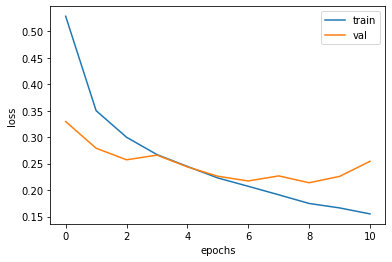

375/375 [==============================] - 1s 4ms/step - loss: 0.2139 - accuracy: 0.9233


[0.21389999985694885, 0.9233333468437195]

In [7]:
# Plot train loss and validation loss
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

# evaluate()
model.evaluate(val_scaled, val_target)

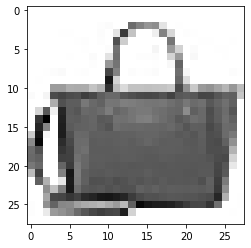

[[7.71793988e-17 3.97276757e-23 1.23922310e-16 1.07999586e-16
  4.69024606e-14 3.15969044e-16 1.93856510e-17 3.79439725e-17
  1.00000000e+00 2.95735598e-18]]


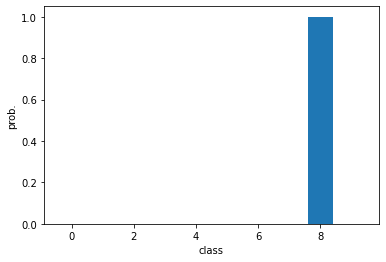

Bag


In [8]:
# Compare predicted label from a validation sample

plt.imshow(val_scaled[0].reshape(28, 28), cmap='gray_r')
plt.show()

preds = model.predict(val_scaled[0:1]) # expects the batch dimension (1(batch; num of samples), 28, 28, 1(channel dimension))

# Print class probabilites for the sample
print(preds)

# Plot probabilites (for 0-9 labels)
plt.bar(range(0, 10), preds[0])
plt.xlabel('class')
plt.ylabel('prob.')
plt.show()

# fashion_MNIST labels
classes = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle Boot']

# Print predicted label
import numpy as np

print(classes[np.argmax(preds)])

In [9]:
# Test score
test_scaled = test_input.reshape(-1, 28, 28, 1) / 255.0
model.evaluate(test_scaled, test_target)

313/313 [==============================] - 2s 5ms/step - loss: 0.2435 - accuracy: 0.9165


[0.2435159981250763, 0.9164999723434448]

In [20]:
# Visualize convolution weights

# Input and output from conv2D-layer
print(model.input)
print(model.layers[0].output) # model._layers includes InputLayer
print()

# kernels and biases from conv2D-layer
conv = model.layers[0]
print(conv.weights)

KerasTensor(type_spec=TensorSpec(shape=(None, 28, 28, 1), dtype=tf.float32, name='conv2d_1_input'), name='conv2d_1_input', description="created by layer 'conv2d_1_input'")
KerasTensor(type_spec=TensorSpec(shape=(None, 28, 28, 32), dtype=tf.float32, name=None), name='conv2d_1/Relu:0', description="created by layer 'conv2d_1'")

[<tf.Variable 'conv2d_1/kernel:0' shape=(3, 3, 1, 32) dtype=float32, numpy=
array([[[[ 1.46285281e-01,  7.61069134e-02, -2.25704145e-02,
          -3.19621027e-01, -2.42396325e-01,  2.06093326e-01,
          -2.69125909e-01, -3.34473774e-02, -5.38463116e-01,
           5.55278314e-03,  1.89619392e-01,  1.15069792e-01,
          -2.94373572e-01,  2.13281304e-01,  1.34884253e-01,
           1.24026589e-01,  8.83268565e-02, -3.32345188e-01,
          -1.83266308e-02, -2.33425111e-01, -8.48978996e-01,
           5.61774522e-02, -7.87952393e-02,  2.57844359e-01,
          -1.53815359e-01,  3.61897461e-02,  1.66602895e-01,
           1.35905549e-01, -2.72118360e-01, -1

(3, 3, 1, 32) (32,)
-0.010889302 0.24497043


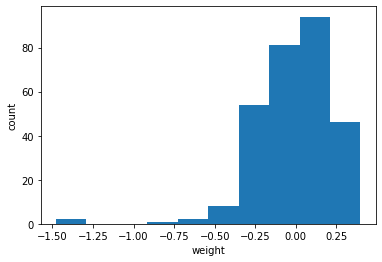

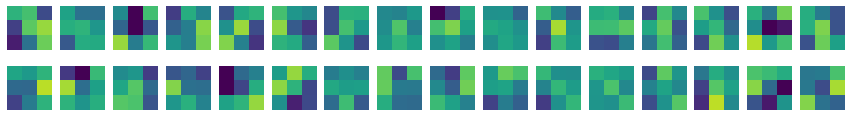

In [11]:
print(conv.weights[0].shape, conv.weights[1].shape) # 32 filters

# mean and standard deviation from kernels(weights)
conv_weights = conv.weights[0].numpy()
print(conv_weights.mean(), conv_weights.std())

# Plot histogram
plt.hist(conv_weights.reshape(-1, 1)) # to 1-d array
plt.xlabel('weight')
plt.ylabel('count')
plt.show()

# visualize kernels (for 32 filters)
fig, axs = plt.subplots(2, 16, figsize=(15, 2))
for i in range(2):
  for j in range(16):
    axs[i, j].imshow(conv_weights[:, :, 0, i*16+j], vmin=-0.5, vmax=0.5) # data range for colormap
    axs[i, j].axis('off')
plt.show()

(3, 3, 1, 32) (32,)
0.00040453754 0.08457095


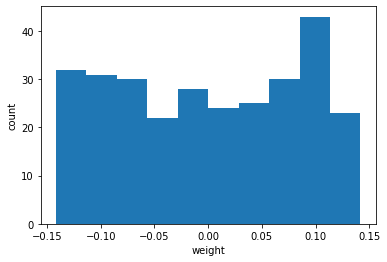

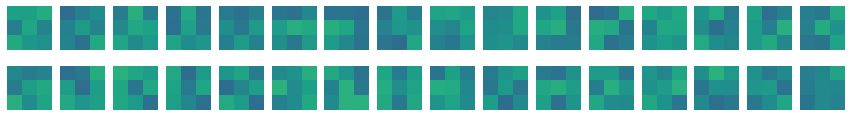

In [12]:
# Compare with untrained conv kernels
no_training_model = keras.Sequential()
no_training_model.add(keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same', input_shape=(28, 28, 1)))

no_training_conv = no_training_model.layers[0]
print(no_training_conv.weights[0].shape, no_training_conv.weights[1].shape)

# mean and standard deviation from kernels(weights)
no_training_weights = no_training_conv.weights[0].numpy()
print(no_training_weights.mean(), no_training_weights.std())

# Plot histogram
plt.hist(no_training_weights.reshape(-1, 1)) # to 1-d array
plt.xlabel('weight')
plt.ylabel('count')
plt.show()

# visualize kernels
fig, axs = plt.subplots(2, 16, figsize=(15, 2))
for i in range(2):
  for j in range(16):
    axs[i, j].imshow(no_training_weights[:, :, 0, i*16+j], vmin=-0.5, vmax=0.5) # data range for colormap
    axs[i, j].axis('off')
plt.show()

### [Functional API](https://keras.io/guides/functional_api/)

In [16]:
# The functional API can handle models with non-linear topology, shared layers, and even multiple inputs or outputs

# Build a dnn model with functional API

# Create a input layer (Sequential InputLayer)
inputs = keras.Input(shape=(784,))

# fully connected layers
dense1 = keras.layers.Dense(100, activation='sigmoid') # hidden layer
dense2 = keras.layers.Dense(10, activation='softmax') # output layer

# Create new node(layer) by calling a layer on Input object (<-> Sequential model.add())
hidden = dense1(inputs)
outputs = dense2(hidden)

# Create a model by connecting inputs and outputs
model_func = keras.Model(inputs, outputs)
#model_func.summary()

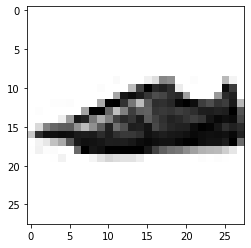

(1, 28, 28, 32)


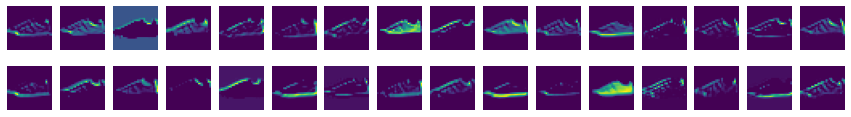

In [30]:
# Visualize feature maps

# Create a new model from conv2D-layer
conv_acti = keras.Model(model.input, model.layers[0].output)

# sample from train set
plt.imshow(train_scaled[0].reshape(28, 28), cmap='gray_r')
plt.show()

# Create feature maps from conv2D model
feature_maps = conv_acti.predict(train_scaled[0:1]) # expects the batch dimension
print(feature_maps.shape)

# visualize feature maps (for 32 filters)
fig, axs = plt.subplots(2, 16, figsize=(15, 2))
for i in range(2):
  for j in range(16):
    axs[i, j].imshow(feature_maps[0, :, :, i*16+j])
    axs[i, j].axis('off')
plt.show()

(1, 14, 14, 64)


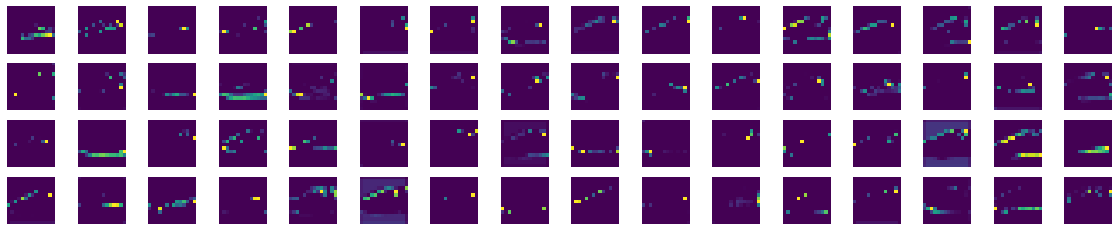

In [33]:
# second conv2D-layer
conv2_acti = keras.Model(model.input, model.layers[2].output)

feature_maps = conv2_acti.predict(train_scaled[0:1])
print(feature_maps.shape) # pooling applied

fig, axs = plt.subplots(4, 16, figsize=(20,4))
for i in range(4):
  for j in range(16):
    axs[i, j].imshow(feature_maps[0, :, :, i*16+j])
    axs[i, j].axis('off')
plt.show()